# Part II - What is the role of the family plays in the student academic success?
## by Dingdong Li

## Investigation Overview

  In this project, I want to look at how the immigration status, family structure and parents education and occupation status can affect the students' academic performance in the United States.  
  We found that the parents educational level and occupational status play important roles in students' academic success, and the family structure will influence the relationship between students' academic performance and highest occupational status of parents.

## Dataset Overview
  The dataset that I analysed is the OECD’s Programme for International Student Assessment 2012 survey dataset (PISA2012). The survey assessed the 15-year-old students' skills and knowledge in mathematics, science and reading. The original PISA2012 dataset has 485,490 rows and 636 columns, but the features used for this analysis includes gender, immigrant background, family Structure, occupational status of parents, parental education in years,out-of-School study time and students' plausible value 1 in mathematics, reading and science.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#load in the dataset into a pandas dataframe 
# columns used for analysis 
cols_list = ['CNT', 'STIDSTD','ST04Q01','IMMIG','FAMSTRUC','HISEI','HISCED',
             'OUTHOURS','PV1MATH','PV1READ', 'PV1SCIE']
df = pd.read_csv("pisa2012.txt", encoding= 'unicode_escape', usecols = cols_list)

In [3]:
# data wrangling
df_us= df.query('CNT in "United States of America"')
df_us=df_us.rename(columns={"ST04Q01": "GENDER"})
df_us= df_us.astype({'STIDSTD': 'str'})
df_us.loc[df.OUTHOURS>70,'OUTHOURS'] = np.nan;

In [4]:
df_us2 = df_us.melt(id_vars=['CNT', 'STIDSTD','GENDER','IMMIG','FAMSTRUC','HISEI','HISCED','OUTHOURS'], 
                    value_vars=['PV1MATH','PV1SCIE','PV1READ'],var_name='Subject',value_name='Score');

# df_us2['FAMSTRUC']=df_us2['FAMSTRUC'].replace([1, 2, 3], ['Single parent', 'Two parents','Not with parents']);
# df_us2['Subject']=df_us2['Subject'].replace(['PV1MATH','PV1READ', 'PV1SCIE'], 
#                                             ['Math', 'Reading','Science']);
# df_us2=df_us2.rename(columns={'FAMSTRUC': 'Family Structure'});

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of the math science and reading scores

The distribution of the students' math science and reading scores are all normally distributed, ranging from 200 to 800, with the mean value of 481.1 for math, 497.79 for science and 497.47 for reading.

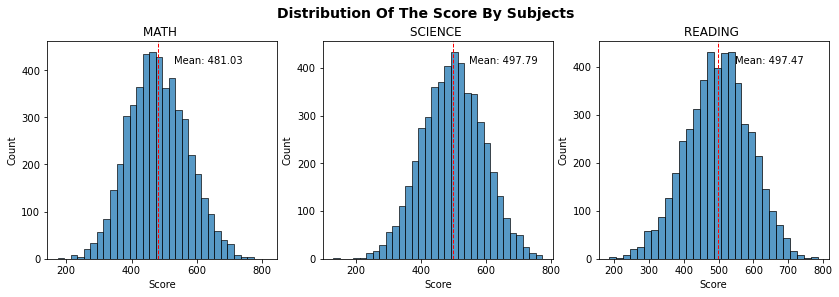

In [5]:
# Distribution of the GRADE MATH Science and Reading scores
sub_ls= ['PV1MATH','PV1SCIE','PV1READ']
sub_name = ['MATH','SCIENCE','READING']
fig, ax = plt.subplots(1,3, figsize = [14,4])

for  i in range(len(sub_ls)):
    sub = sub_ls[i]
    bins = np.arange(df_us[sub].min(), df_us[sub].max()+0.1,20)
    sb.histplot(data = df_us, x = sub, bins = bins,ax = ax[i])
    ax[i].set_xlabel('Score')
    ax[i].set_title('{} '.format(sub_name[i]))
    ax[i].axvline(df_us[sub].mean(), color='r', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = ax[i].get_ylim()
    ax[i].text(df_us[sub].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df_us[sub].mean()))
plt.suptitle("Distribution of the score by subjects".title(),y=1, fontsize =14, weight = 'bold')
plt.show()

## Distribution of immgration background
The majority of the participants are native, about 700 students are second-generation and 300 students are first-generation. 

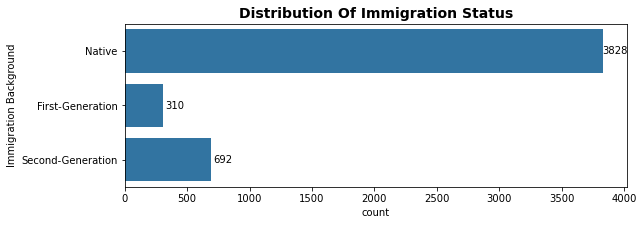

In [6]:
# Distribution of IMMIG
plt.figure(figsize=(9,3));
ax=sb.countplot(y='IMMIG', data=df_us, orient ='h',order = ['Native', 'First-Generation','Second-Generation'],color ='tab:blue');
plt.ylabel('Immigration Background');
rects = ax.patches;
def autolabel_h(ax,rects):
    ''' 
        Annotate the value of each bar in a horizontal bar plot.

            Parameters:
                    ax (matplotlib Axes): Axes object to draw the barplot onto
                    rects (matplotlib.patches.Rectangle): The bars of the barplot to annotate on
            return: 

    '''
    for rect in rects:
        width = rect.get_width()
        ax.annotate(format(width, '.0f'),(width, rect.get_y()+0.5*rect.get_height()),
                     ha='center', va='center', xytext=(12, 0),textcoords='offset points')
        
autolabel_h(ax,rects);
plt.title('Distribution of immigration status'.title(),y=1, fontsize =14, weight = 'bold');

## Distribution of family structure 
Most of the students are from two-parents family, about 900 are from single-parents family, very few students are not living with their parents.

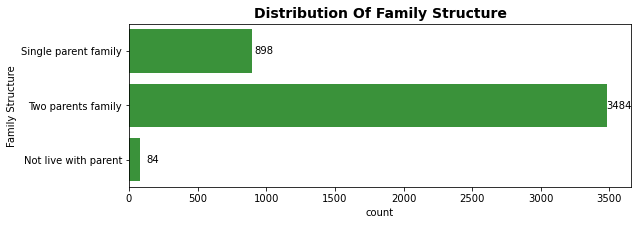

In [7]:
# Distribution of FAMSTRUC
plt.figure(figsize=(9,3))
ax=sb.countplot(y='FAMSTRUC', data=df_us, orient ='h',color ='tab:green');
plt.ylabel('Family Structure');
plt.yticks([0,1,2],['Single parent family', 'Two parents family','Not live with parent']);
autolabel_h(ax,ax.patches);
plt.title('Distribution of family structure'.title(),y=1, fontsize =14, weight = 'bold');

## Distribution of highest educational level of parents

In most of the cases, at least one of the students' parents achieved education of ISCED 5A,6 (theoretically oriented tertiary and post-graduate) and ISCED 3A (general upper secondary)/ISCED 4 (non-tertiary post-secondary) level of education.

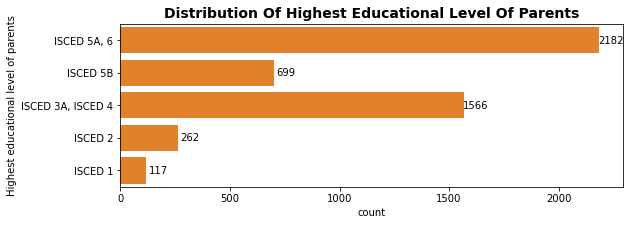

In [8]:
# Distribution of FAMSTRUC
plt.figure(figsize=(9,3))
order_ed = ['ISCED 5A, 6','ISCED 5B','ISCED 3A, ISCED 4','ISCED 2','ISCED 1']
ax=sb.countplot(y='HISCED', data=df_us, orient ='h',order =order_ed,color ='tab:orange');
plt.ylabel('Highest educational level of parents');
autolabel_h(ax,ax.patches);
plt.title('Distribution of highest educational level of parents'.title(),y=1, fontsize =14, weight = 'bold');

## Distribution of highest occupational status of the parents
The highest occupational status of the parents range from 10 to about 90, is a multimode distrbution.

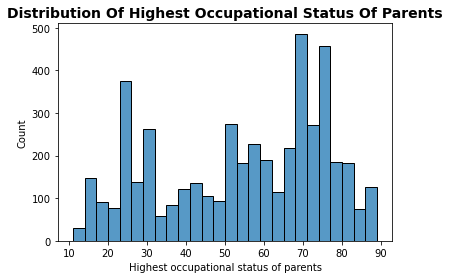

In [9]:
plt.figure(figsize = (6,4))
nbin = np.arange(df_us['HISEI'].min(), df_us['HISEI'].max()+0.1,3)
sb.histplot(data = df_us, x = 'HISEI',color = 'tab:blue', bins = nbin);
plt.xlabel('Highest occupational status of parents');
plt.title('Distribution of highest occupational status of parents'.title(),y=1, fontsize =14, weight = 'bold');

## MATH, SCIENCE and READING score vs. immigration background
The students with different immigration background, their academic performance are not very different from each other, except that the native students seem to slightly better than students who are first or second generation.

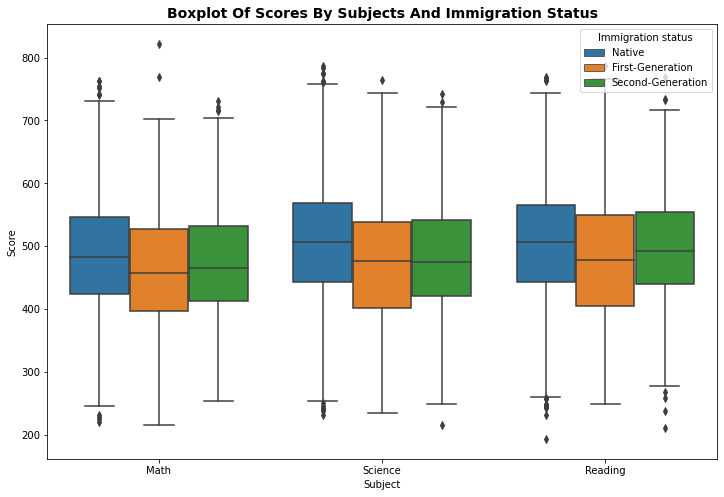

In [10]:
# box plot of the academic performance in math, science and reading for different immigration backgrounds
plt.figure(figsize = [12,8])
ax = sb.boxplot(x="Subject", y="Score", hue='IMMIG', data=df_us2);
ax.set_xticklabels(['Math','Science','Reading']);
plt.title('boxplot of scores by subjects and immigration status'.title(),y=1, fontsize =14, weight = 'bold');
plt.legend(title='Immigration status', loc='upper right');

## MATH, SCIENCE and READING scores vs. highest educational level of parents
In general, the students whose parents have higher education tends to have better academic performance in all three subjects.

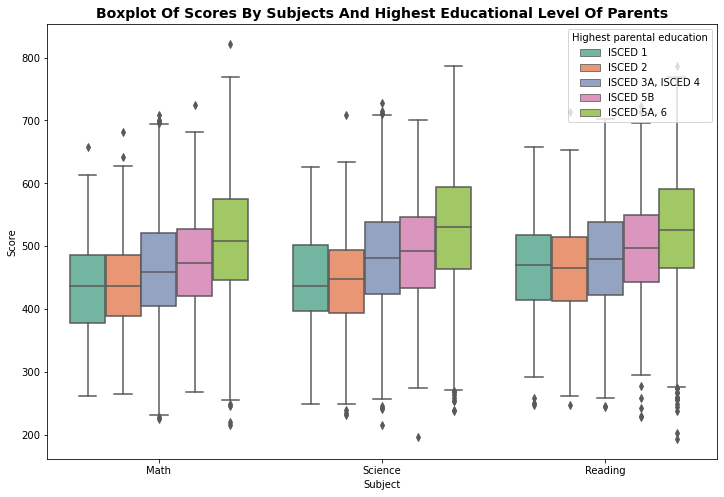

In [11]:
plt.figure(figsize = [12,8]);
ax = sb.boxplot(x="Subject", y="Score", hue='HISCED', data=df_us2.query('HISCED not in "None"'),
                hue_order =['ISCED 1','ISCED 2','ISCED 3A, ISCED 4','ISCED 5B', 'ISCED 5A, 6'],palette="Set2");
ax.set_xticklabels(['Math','Science','Reading']);
plt.title('boxplot of scores by subjects and highest educational level of parents'.title(),y=1, fontsize =14, weight = 'bold');
plt.legend(title='Highest parental education', loc='upper right');

## MATH, SCIENCE and READING score vs. highest parents occupational status
The students' academic performances have moderate positive correlation with the highest occupational status of the parents.

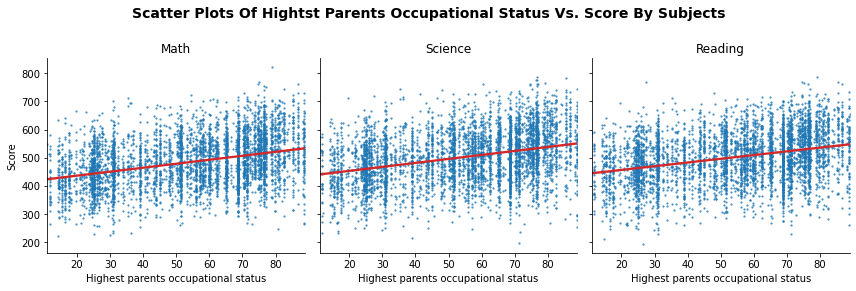

In [12]:
g = sb.FacetGrid(df_us2, col="Subject", height =5);
g.map_dataframe(sb.regplot, x='HISEI', y="Score", scatter_kws={"linewidth":0,"s":5},line_kws={"color":'tab:red'},)
g.set_axis_labels('Highest parents occupational status', "Score");
axes = g.axes.flatten();
axes[0].set_title("Math");
axes[1].set_title("Science");
axes[2].set_title("Reading");
# Set plot dimentions - figure level
g.fig.set_size_inches(12,4);
plt.suptitle('Scatter plots of Hightst parents occupational status vs. score by subjects'.title(),y=1, fontsize =14, weight = 'bold');
g.tight_layout();

## MATH, SCIENCE and READING score vs. highest parental occupation status with different family structures
The students who do not live together with their parents, the regression line of the highest occupational status of parents vs. students academic performance is almost flat. The slop of the regression line for the two parents family is larger than the regression slope of the single-parents family.

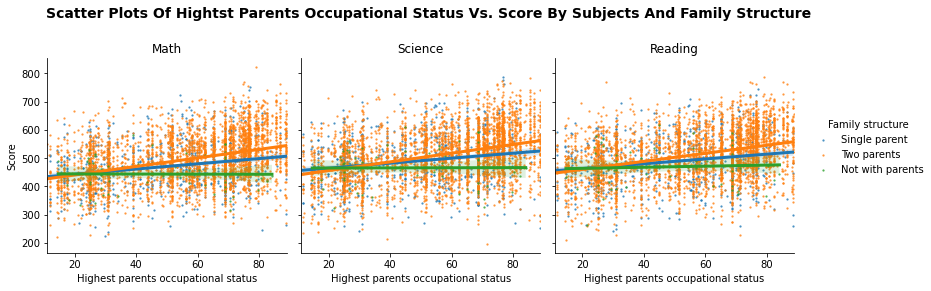

In [13]:

# regression plot of occupational status and students's score
g=sb.lmplot(x='HISEI', y="Score", col = 'Subject',hue= 'FAMSTRUC', scatter_kws={"linewidth":0,"s":5},line_kws={"linewidth":3},
                data=df_us2, sharey = True);
g.set_axis_labels('Highest parents occupational status', "Score");
axes = g.axes.flatten();
axes[0].set_title("Math");
axes[1].set_title("Science");
axes[2].set_title("Reading");
#change the title and labels of the legend
g._legend.set_title('Family structure');
g._legend.texts[0].set_text("Single parent");
g._legend.texts[1].set_text("Two parents");
g._legend.texts[2].set_text("Not with parents");
# move the legend to the right 
g._legend.set_bbox_to_anchor((1.08,0.5));
#Set plot dimentions - figure level
g.fig.set_size_inches(12,4);
plt.suptitle('Scatter plots of Hightst parents occupational status vs. score by subjects and family structure'.title(),y=1, fontsize =14, weight = 'bold');
g.tight_layout();


>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [15]:
!jupyter nbconvert Part_II_slide_deck_PISA2012_DL.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_PISA2012_DL.ipynb to slides
[NbConvertApp] Writing 1050523 bytes to Part_II_slide_deck_PISA2012_DL.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_PISA2012_DL.slides.html
Use Control-C to stop this server
^C

Interrupted


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 